How do we **measure the quality or value of the prediction** in the selected business or
science problem? What will be the quantitative score? **How does the quantitative score
reflect the quality or value of the prediction?** How does the (possibly asymmetric)
prediction error convert into cost or decreased KPI?

## Prediction value measurement and quantitative score(s)

### Usual classification metrics and their limitations

As a Machine Learning problem, the aim of this project is to provide a binary probabilistic classifier, that takes as an input a dermoscopic image of a mole, and provides as an output the probability of this mole being *malignant*, i.e. potentially dangerous for the patient. We will thus define the image to be classified as belonging to the **positive class** if it is malignant, and to the **negative class** if it is *benign*, i.e. not harmful.

We introduce the standard terminology used for such classification problems:

* **TP** = number of samples that were predicted as belonging to the positive class that are indeed positive (malignant moles here)
* **FP** = number of samples that were predicted positive but that are in fact negative
* **TN** = number of samples that were predicted as belonging to the negative class that are indeed negative (benign moles here)
* **FN** = number of samples that were predicted negative but that are in fact positive

For further readability, we also introduce some other terminology that is sometimes used:

* **P** = number of samples that are *really* labelled as belonging to the positive class, according to the gold standard malignancy diagnosis
* **N** = number of samples that are *really* labelled as negative

With all of this set up, we can define the metrics that are usually used for evaluating binary classifiers:

The most obvious and famous one is the **Accuracy**, which is simply the percentage of correctly classified samples among the data set, and read:

$$
AC = \frac{TP + TN}{P + N}
$$

Another very common classification metric is the **Recall**, also known as the **Sensitivity** in Statistics, or as the **True-Positive rate** TPR. This ratio expresses how much of the members of the positive class has been well predicted by the classifier:

$$
SE = \frac{TP}{TP + FN}
$$

One final common perfomance indicator that we will introduce is the **Specificity** (the complement of what we will further call the False-Positive rate FPR), which this time describes how well the classifier did in identifying the members of the negative class:

$$
SP = \frac{TN}{TN + FP}
$$

Intuitively, these scores tend to describe well what we want to accomplish here: identify the right class for a given input. However, in our particular setting, like for most disease detection ones in Machine Learning, limiting us to a balanced combination of just these 3 scores will not be sufficient, nor reflect the true quality of the classifier's predictions.

First, our **dataset is quite imbalanced**: malignant moles only represent around 30% of the dataset. Despite not being *highly* imbalanced, this suffices to favor benign predictions when it comes to only focusing on a raw accuracy improvement. For instance, predicting all moles as being benign would lead to an accuracy score around 70%, against 30% for an only malignant prediction.

This leads us to the second important point, as the prediction can have a direct impact on the patient's decision to consult his dermatologist or not, **the prediction error cost is highly asymmetric**: we want to incorporate in the general score the fact that **failing the prediction of a trully maligant mole has a much dramatic effect than sending someone to its dermatologist for a benign one**. For this reason, we want to put more wait on the recall score, as defined above, but we will also add another score that goes in this sense later in this section.

### Area under the ROC curve

To tackle the imbalance problem (as well as the false negative minimisation as we will see), we will also grant importance to the **AUC** metric. Formally, this metric simply measures the area under the Receiver Operating Characteristic (ROC) of the given classifier.

As a simplified (and not 100% rigorous) example, let us consider the following plots, that are quite common while explaining the AUC concept, resulting from the evaluation of 3 distinct classifiers:

![example_distributions](img/example_dist.png)

First considering the <font color="blue">**blue**</font> distribution, which corresponds to the distribution that the classifier outputed for the samples which were labeled as being <font color="blue">**truly negative**</font> (the images labeled as representing benign moles in our context). Thus, the x-axis could be interpreted as representing the outputed probability***** of the class being negative according to the classifier.

_*****As we will see however, what really matters is that the x value for a positive sample has to be significantly more often larger than the one for a negative sample._

So for all truly negative sample, we get a distribution outputed by the classifier (the y-axis is thus directly proportional to the number of negative samples that got the same value for x according to the classifier).

The same thing is represented with the <font color="red">**red**</font> distribution, which this time just refers to the <font color="red">**truly positive**</font> samples, i.e. the images labeled as showing malignant moles.

If the classifier **does a great job at separating the 2 classes**, ...

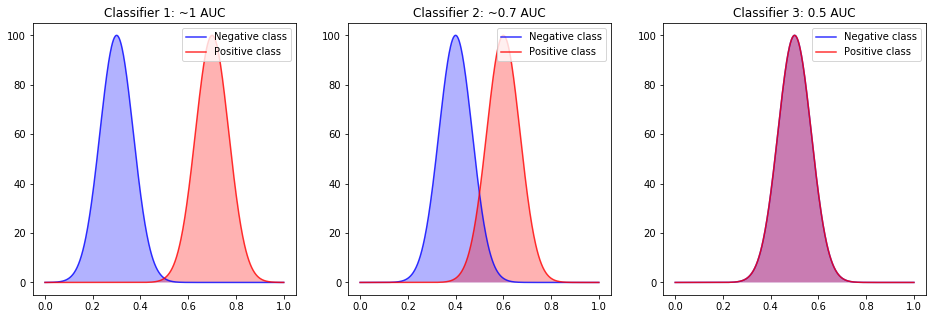

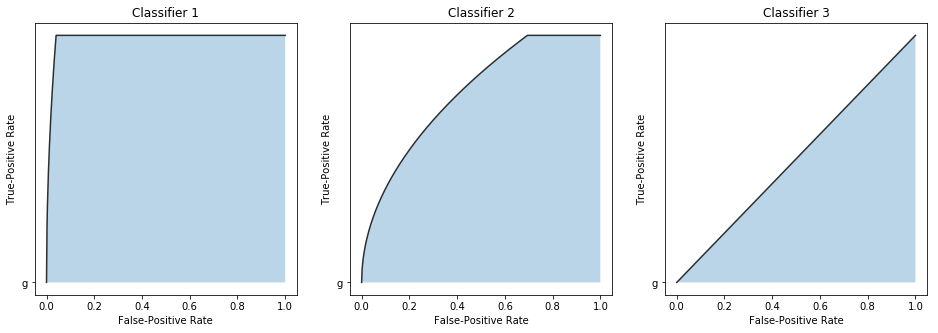

In [77]:
import numpy as np 
import matplotlib.pyplot as plt

# Density of the normal distribution
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Distributions plotting setting
fig_dist = plt.figure(figsize=(16, 5))
axes_dist = []
mus = [[0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]
titles = ['~1', '~0.7', '0.5']

# ROC curves-ish setting
fig_roc = fig = plt.figure(figsize=(16, 5))
axes_roc = []
coeffs = [5, 1.2, 0]

def add_gaussians(ax, mus): 
    x = np.linspace(0, 1, 500)
    neg_dist = 100 * gaussian(x, mus[0], 0.07)
    pos_dist = 100 * gaussian(x, mus[1], 0.07)
    # Outline
    ax.plot(x, neg_dist, c='b', alpha=0.8, label="Negative class")
    ax.plot(x, pos_dist, c='r', alpha=0.8, label="Positive class")
    # Fill
    ax.fill(x, neg_dist, 'b', x, pos_dist, 'r', alpha=0.3)
    ax.legend(loc="upper right")
def add_roc(ax, coeff): 
    x = np.linspace(0, 1, 500)
    y = np.minimum(1, np.sqrt(x) * coeff if coeff != 0 else x)
    # Outline
    ax.plot(x, y, c='k', alpha=0.8)
    ax.fill_between(x, y, 'g', alpha=0.3)
    plt.xlabel('False-Positive Rate')
    plt.ylabel('True-Positive Rate')

for i in range(3):
    axes_dist.append(fig_dist.add_subplot(131 + i))
    axes_dist[-1].set_title('Classifier ' + str(i + 1) + ': ' + titles[i] + ' AUC')
    add_gaussians(axes_dist[-1], mus[i])
    
    axes_roc.append(fig_roc.add_subplot(131 + i))
    axes_roc[-1].set_title('Classifier ' + str(i + 1))
    add_roc(axes_roc[-1], coeffs[i])
plt.show()

### Conclusion sur les métriques (section temporaire)

* Accuracy
* Recall (sensitivity)
* Specificity
* AUC
* **Courbe ROC** (courbes de la deuxième images) (peut être générée pour un classifieur donnée), prendre la **valeur de seuil (threshold) qui donne un TPR (i.e. l'ordonnée sur le plot) (= recall) de 97%** et pour cette valeur, prendre **(1 - abscisse)** = (1 - FPR) = Sensitivity **comme score**. (nombre de négatifs bien classifiés en imposant un recall de 97%)

Pour ces scores : le plus haut, mieux c'est.

**mixed** = moyenne pondérée des scores en mettant un peu moins de poids sur accuracy et specificity. Puis faire **mixed := 1 - mixed** pour avoir un objectif de 0 et un score tel que "le plus bas, mieux c'est".